                  TASK 26
 Assignemet on Home Loan Dataset Exploratory Data Analysis (EDA)  
 Project Topic Overview : Home Loan Risk & Approval Analysis

In [ ]:
 # Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2. Loading the  Dataset (Train Data set)

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)

In [4]:
url= "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
df = pd.read_csv(url)
df.head


<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

 3. Now Basic Info and Data Types

In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


4. Missing Value Analysis

In [7]:
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Value Percentage:\n", missing_percent)

# # Visualize missing values
# plt.figure(figsize=(10,5))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title("Missing Values Heatmap")
# plt.show()


Missing Values per Column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing Value Percentage:
 Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


5. Now we go into Data Cleaning of Train Data

In [8]:
# Fill categorical missing values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical missing values with median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace=True)

# Verify again
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


6. want to check for Outlier Detection & Treatment if possible on it.

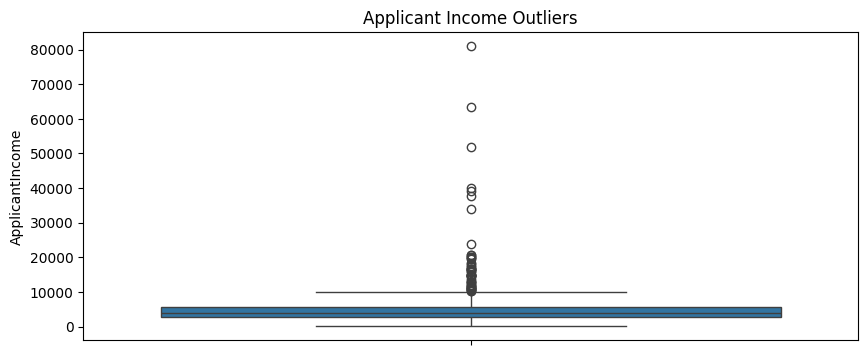

In [9]:
# Boxplot to detect outliers
plt.figure(figsize=(10,4))
sns.boxplot(df['ApplicantIncome'])
plt.title("Applicant Income Outliers")
plt.show()

# Cap outliers using IQR method
for col in ['ApplicantIncome', 'LoanAmount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, 
                       np.where(df[col] < lower, lower, df[col]))

 7. Univariate Analysis

In [23]:

def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


8. cont.

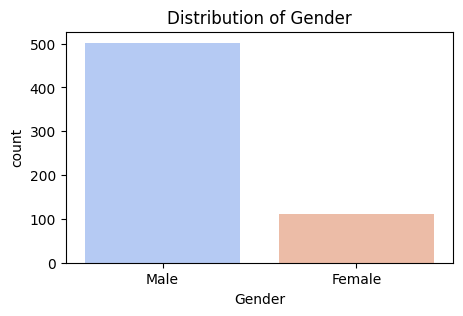

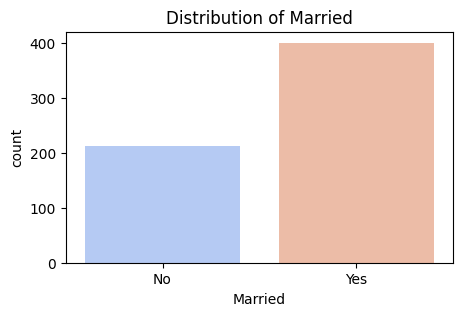

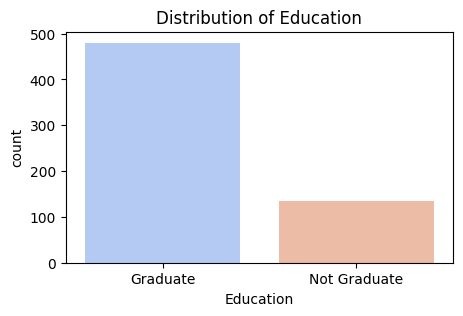

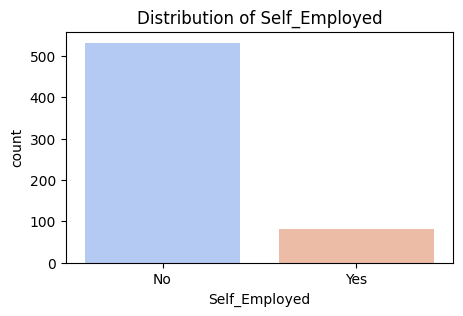

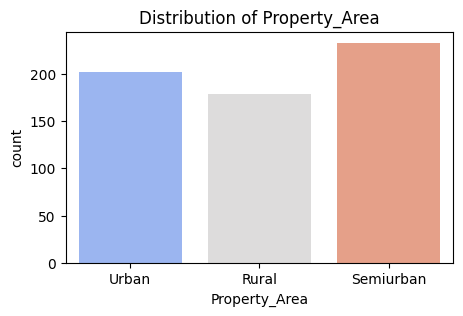

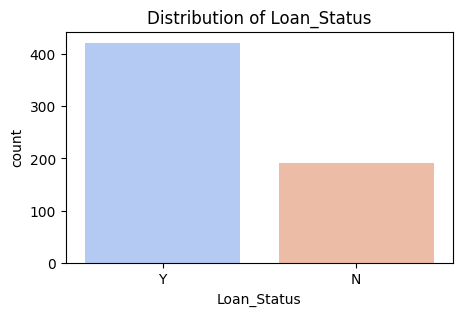

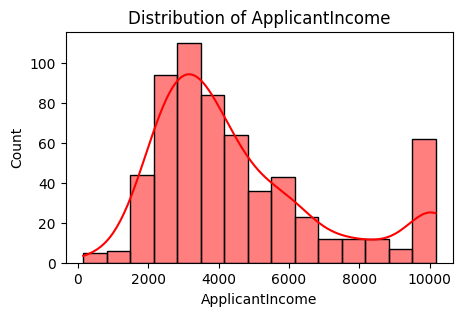

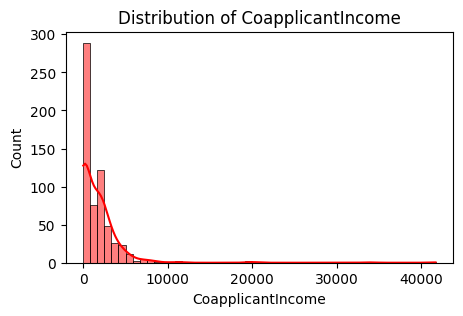

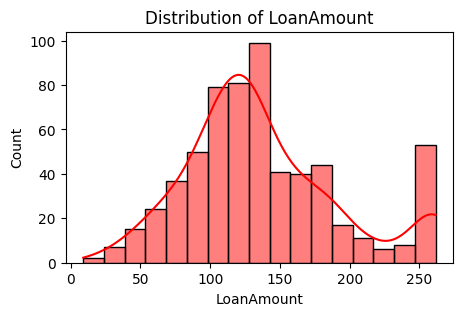

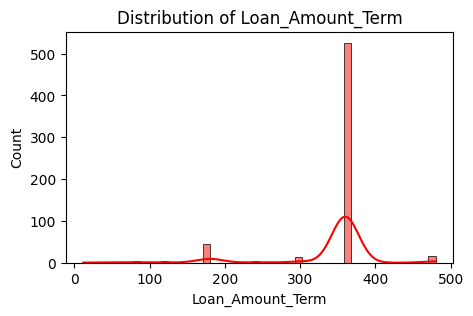

In [24]:
from pandas import Categorical
# Univariate Analysis

# Categorical Features
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 
                    'Property_Area', 'Loan_Status']

for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f"Distribution of {col}")
    plt.show()
# Numerical Features
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, color='Red')
    plt.title(f"Distribution of {col}")
    plt.show()





9.  checking after treatment

In [25]:
df[['ApplicantIncome', 'LoanAmount']].describe()


,ApplicantIncome,LoanAmount
count,614.000000,614.000000
mean,4617.111564,137.365635
std,2479.851729,55.779749
min,150.000000,9.000000
25%,2877.500000,100.250000
50%,3812.500000,128.000000
75%,5795.000000,164.750000
max,10171.250000,261.500000


10. Bivariate Analysis

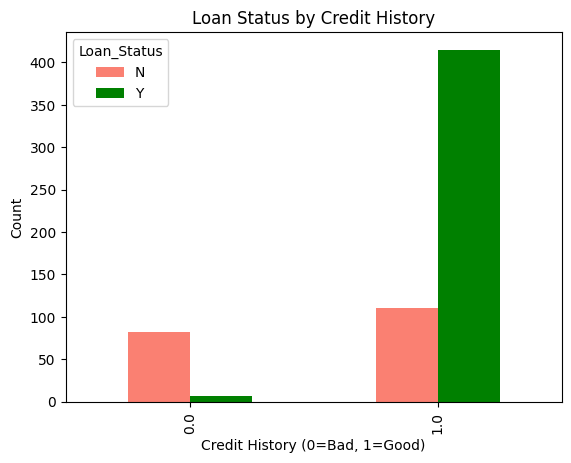

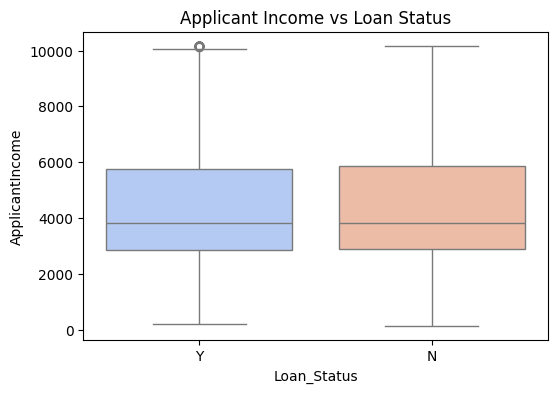

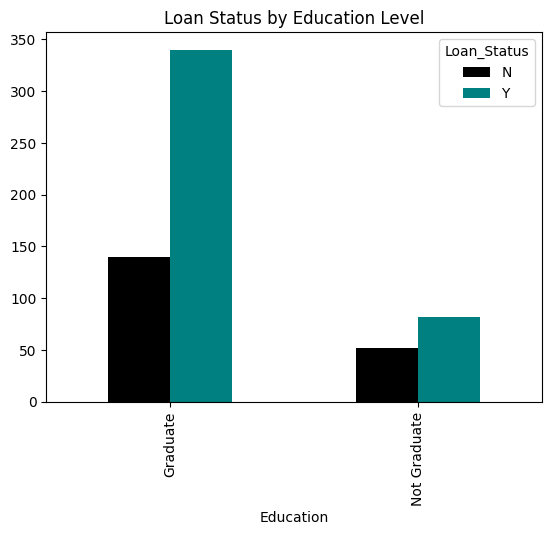

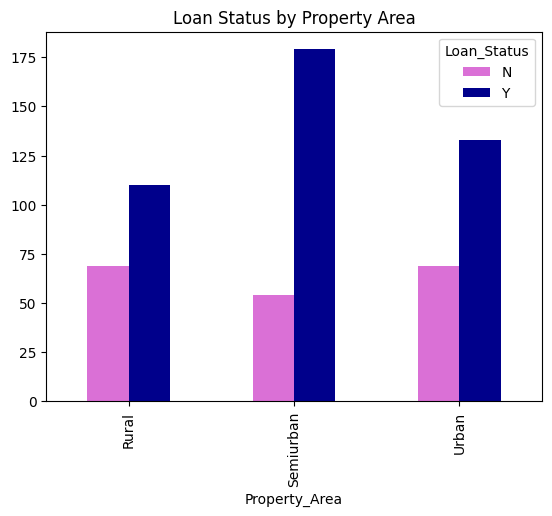

In [26]:
# Bivariate Analysis

# Credit History vs Loan Status
credit_loan = pd.crosstab(df['Credit_History'], df['Loan_Status'])
credit_loan.plot(kind='bar', color=['salmon', 'green'])
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History (0=Bad, 1=Good)")
plt.ylabel("Count")
plt.show()

# Income vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='coolwarm')
plt.title("Applicant Income vs Loan Status")
plt.show()

# Education vs Loan Status
edu_loan = pd.crosstab(df['Education'], df['Loan_Status'])
edu_loan.plot(kind='bar', color=['black', 'teal'])
plt.title("Loan Status by Education Level")
plt.show()

# Property Area vs Loan Status
prop_loan = pd.crosstab(df['Property_Area'], df['Loan_Status'])
prop_loan.plot(kind='bar', color=['orchid', 'darkblue'])
plt.title("Loan Status by Property Area")
plt.show()



12. finally we need nto do Correlation Analysis

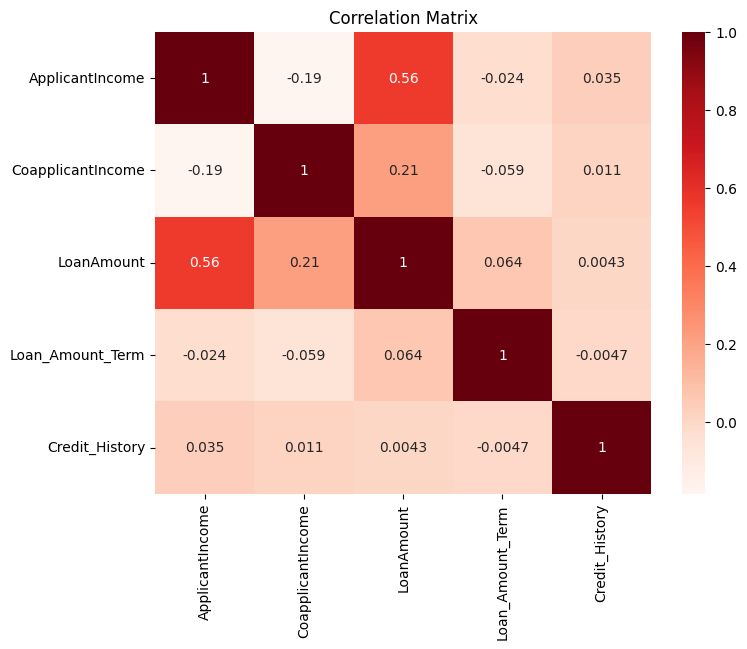

In [20]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()


13. Top correlations with loan amount

In [21]:
print("\nCorrelation with LoanAmount:\n", corr['LoanAmount'].sort_values(ascending=False))



Correlation with LoanAmount:
 LoanAmount           1.000000
ApplicantIncome      0.557953
CoapplicantIncome    0.214491
Loan_Amount_Term     0.063612
Credit_History       0.004320
Name: LoanAmount, dtype: float64


SUMMARY BASED ON THE OUTPUT GENERATED FROM TOP CORRELATION WITH LOAD AMOUNT SHOWS BELOW WITH THIS INTERPRETATION

NOTE: ALL VALUES IS TO THE  NEAREST TWO NUMBER AFTER DECIMAL NUMBERS

| Variable              | Correlation Value | Meaning                                                                                                            |
| --------------------- | ----------------- | ------------------------------------------------------------------------------------------------------------------ |
| **ApplicantIncome**   | **0.56**          | Moderate positive relationship — as applicant income increases, the loan amount tends to increase too.             |
| **CoapplicantIncome** | **0.21**          | Weak positive relationship — a coapplicant’s income slightly increases the possible loan amount, but not strongly. |
| **Loan_Amount_Term**  | **0.06**          | Very weak relationship — the loan duration (term) doesn’t significantly affect how large the loan is.              |
| **Credit_History**    | **0.00**          | No relationship — credit history has almost no effect on the loan amount itself (though it affects loan approval). |

LOAN AMOUNT = 1.00